In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import dask
from ncar_jobqueue import NCARCluster
#import esmlab
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from scipy import stats
import utils

#### Read in preprocessed data

In [2]:
ds_djf = xr.open_dataset('/glade/derecho/scratch/kristenk/data_SOcocco/DJF_dataset1.nc')
ds_son = xr.open_dataset('/glade/derecho/scratch/kristenk/data_SOcocco/SON_dataset1.nc')
ds_fosi_ann = xr.open_dataset('/glade/derecho/scratch/kristenk/data_SOcocco/annual_dataset1.nc')

In [3]:
ds_djf['time'] = np.arange(1958,2021,1)

In [4]:
ds_djf['perc_cocco'] = (ds_djf.coccoC/(ds_djf.diatC + ds_djf.spC + ds_djf.coccoC))*100.

In [5]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lats = ds_grid.TLAT
lons = ds_grid.TLONG
area = ds_grid.TAREA
area_m = area * 1.e-4
area_km = area * 1.e-10
lons_norm = utils.normal_lons(lons)

In [6]:
ds_djf = ds_djf.where(ds_grid.REGION_MASK > 0)

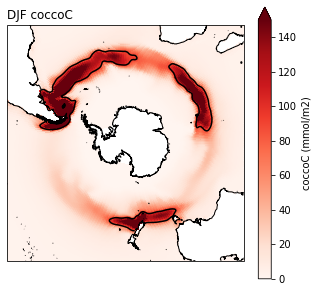

In [7]:
fig = plt.figure(figsize=(18,5))
contour_specs = {'levels': np.arange(-0.6,0.7,0.1)}
siz_lev = [0.5]
############### 
ax = fig.add_subplot(1,3,1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('DJF coccoC', loc='left')

lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.coccoC.mean(dim='time'))

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='Reds',vmin=0,vmax=150)

cocco_lev = [90]
lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.coccoC.mean(dim='time'))
cs = ax.contour(lon,lat,field, colors='black',
                levels = cocco_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

ax.coastlines('10m',linewidth=1)
fig.colorbar(pc,extend='max', label='coccoC (mmol/m2)');

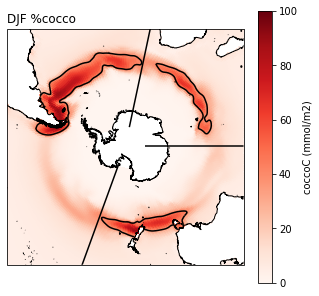

In [8]:
fig = plt.figure(figsize=(18,5))
contour_specs = {'levels': np.arange(-0.6,0.7,0.1)}
siz_lev = [0.5]
############### 
ax = fig.add_subplot(1,3,1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('DJF %cocco', loc='left')

lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.perc_cocco.mean(dim='time'))

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='Reds',vmin=0,vmax=100)

cocco_lev = [40]
lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.perc_cocco.mean(dim='time'))
cs = ax.contour(lon,lat,field, colors='black',
                levels = cocco_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [12]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons_norm.where(lons_norm<15))
cs = ax.contour(lon,lat,field, colors='black',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [90]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons_norm.where(lons_norm>15).where(lons_norm<100))
cs = ax.contour(lon,lat,field, colors='black',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [200]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons.where(lons>120))
cs = ax.contour(lon,lat,field, colors='black',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())


ax.coastlines('10m',linewidth=1)
fig.colorbar(pc, label='coccoC (mmol/m2)');

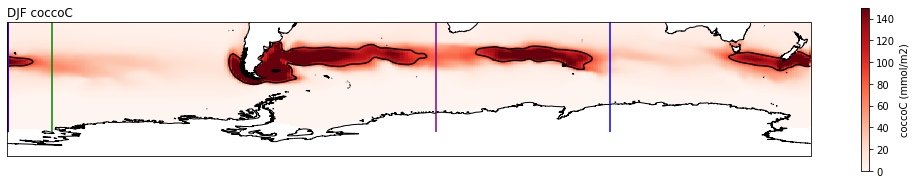

In [9]:
fig = plt.figure(figsize=(18,3))
contour_specs = {'levels': np.arange(-0.6,0.7,0.1)}
siz_lev = [0.5]
############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
#ax.set_title('DJF %cocco', loc='left')
ax.set_title('DJF coccoC', loc='left')

lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.coccoC.mean(dim='time'))

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='Reds',vmin=0,vmax=150)

cocco_lev = [90]
lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_djf.coccoC.mean(dim='time'))
cs = ax.contour(lon,lat,field, colors='black',
                levels = cocco_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [12]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons_norm) #.where(lons_norm<15))
cs = ax.contour(lon,lat,field, colors='purple',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [90]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons_norm) #.where(lons_norm>15).where(lons_norm<100))
cs = ax.contour(lon,lat,field, colors='blue',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())

lon_lev = [200]
lon,lat,field = utils.adjust_pop_grid(lons, lats, lons.where(lons>120))
cs = ax.contour(lon,lat,field, colors='green',
                levels = lon_lev,
                linewidths = 1.5,
                transform=ccrs.PlateCarree())


ax.coastlines('10m',linewidth=1)
fig.colorbar(pc, label='coccoC (mmol/m2)');

In [10]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

In [11]:
twos = np.full((384,320),2,dtype=int)
twos = xr.DataArray(twos,dims=('nlat','nlon'))
twos = twos.where(ds_grid.REGION_MASK>0)

In [12]:
threes = np.full((384,320),3,dtype=int)
threes = xr.DataArray(threes,dims=('nlat','nlon'))
threes = threes.where(ds_grid.REGION_MASK>0)

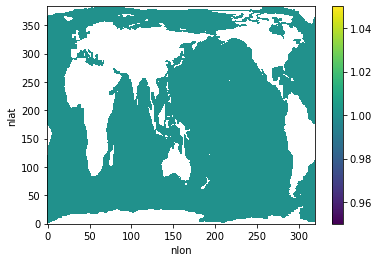

In [13]:
ones.plot()

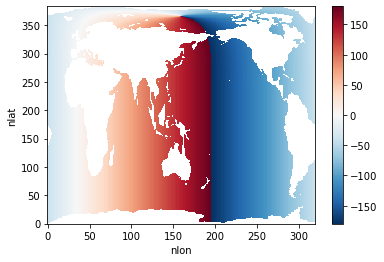

In [14]:
lons_norm.where(ds_grid.REGION_MASK>0).plot()

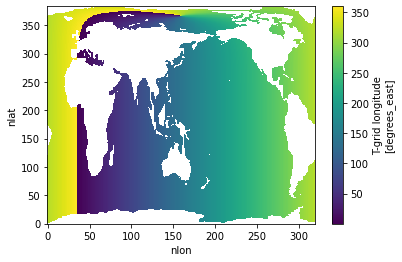

In [15]:
lons.where(ds_grid.REGION_MASK>0).plot()

### Box 1 is the S.America/Atlantic region

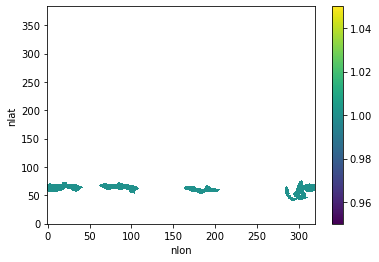

In [16]:
mask_GCB = ones.where(ds_djf.coccoC.mean(dim='time')>90).where(lats<-25)
mask_GCB.plot()

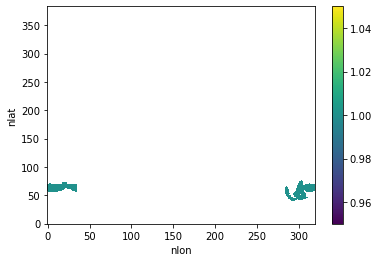

In [17]:
mask_box1 = mask_GCB.where(lons_norm<30).where(lons>250)

mask_box1.plot()

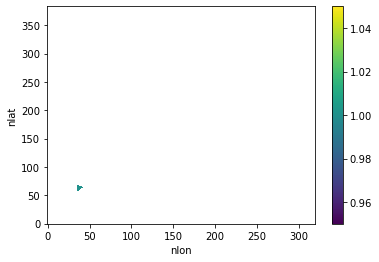

In [18]:
mask_box1b = ones.where(ds_djf.coccoC.mean(dim='time')>90).where(lats<-25).where(lons_norm>0).where(lons_norm<30)

mask_box1b.plot()

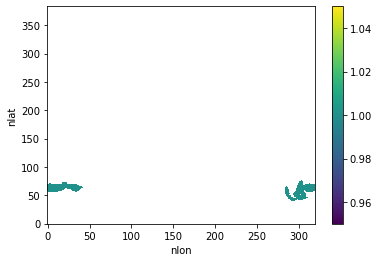

In [19]:
mask_both = mask_box1.fillna(0) + mask_box1b.fillna(0)
mask_both = mask_both.where(mask_both == 1)
mask_both.plot()

In [20]:
mask_box1= mask_both

In [21]:
mask_box1.TLONG.where(mask_box1==1).max().values

array(359.93750501)

In [22]:
mask_box1.TLONG.where(mask_box1==1).min().values

array(1.06250003)

In [23]:
mask_box1.TLAT.where(mask_box1==1).max().values

array(-38.61912046)

In [24]:
mask_box1.TLAT.where(mask_box1==1).min().values

array(-57.31742945)

### Box 2 is the Indian Ocean part of the GCB

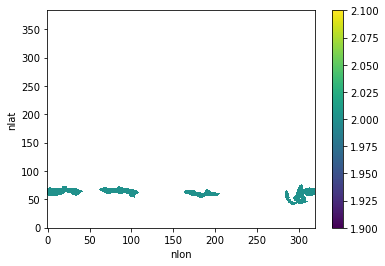

In [25]:
mask_GCB = twos.where(ds_djf.coccoC.mean(dim='time')>90).where(lats<-25)
mask_GCB.plot()

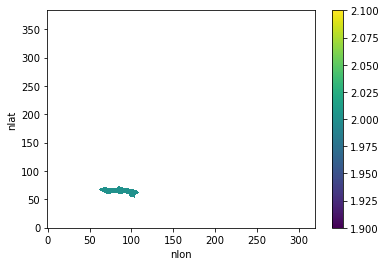

In [26]:
mask_box2 = mask_GCB.where(lons_norm>15).where(lons_norm<100)

mask_box2.plot()

In [27]:
lons_norm.where(mask_box2==2).max().values

array(82.06250228)

In [28]:
lons_norm.where(mask_box2==2).min().values

array(30.31250084)

In [29]:
lats.where(mask_box2==2).max().values

array(-40.7560995)

In [30]:
lats.where(mask_box2==2).min().values

array(-50.90664568)

### Box 3 is GCB region around New Zealand and into the Pacific

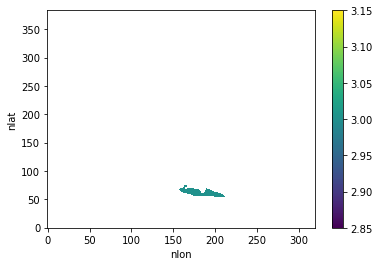

In [31]:
mask_box3 = threes.where(ds_djf.perc_cocco.mean(dim='time')>40).where(lons>100).where(lons<270)

mask_box3.plot()

In [32]:
lons.where(mask_box3==3).max().values

array(197.93750551)

In [33]:
lons.where(mask_box3==3).min().values

array(137.18750382)

In [34]:
lats.where(mask_box3==3).max().values

array(-38.61912046)

In [35]:
lats.where(mask_box3==3).min().values

array(-49.83817525)

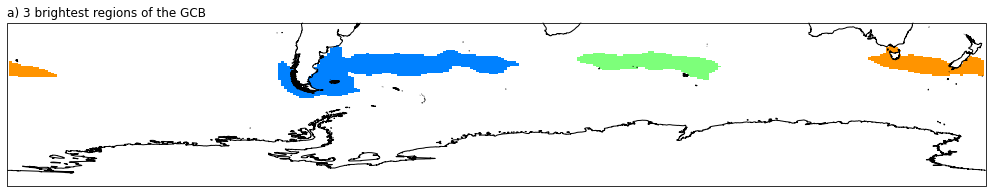

In [36]:
fig = plt.figure(figsize=(18,3))
contour_specs = {'levels': np.arange(-0.6,0.7,0.1)}
siz_lev = [0.5]
############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('a) 3 brightest regions of the GCB ', loc='left')

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box1)

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=4)

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box2)

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=4)

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box3)

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=4)


ax.coastlines('10m',linewidth=1)
#fig.colorbar(pc, label='coccoC (mmol/m2)');

#### Make timeseries for each region

In [37]:
ds_djf

<xarray.Dataset>
Dimensions:                        (nlat: 384, nlon: 320, time: 63, z_t: 60, z_t_150m: 15)
Coordinates:
    TLAT                           (nlat, nlon) float64 ...
    TLONG                          (nlat, nlon) float64 ...
  * z_t                            (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                       (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * time                           (time) int64 1958 1959 1960 ... 2019 2020
Dimensions without coordinates: nlat, nlon
Data variables: (12/19)
    cocco_Fe_lim_Cweight_avg_100m  (time, nlat, nlon) float32 nan nan ... nan
    coccoCaCO3                     (time, nlat, nlon) float32 nan nan ... nan
    DIC                            (time, nlat, nlon) float32 nan nan ... nan
    diatC                          (time, nlat, nlon) float32 nan nan ... nan
    coccoC                         (time, nlat, nlon) float32 nan nan ... nan
    NO3                            (time, nlat, nlon) float32 nan nan ... nan
    ...                             ...
    PH                             (time, nlat, nlon) float32 nan nan ... nan
    IRON_FLUX                      (time, nlat, nlon) float32 nan nan ... nan
    diatSi                         (time, nlat, nlon) float32 nan nan ... nan
    cocco_N_lim_Cweight_avg_100m   (time, nlat, nlon) float32 nan nan ... nan
    Fe                             (time, nlat, nlon) float32 nan nan ... nan
    perc_cocco                     (time, nlat, nlon) float32 nan nan ... nan

In [38]:
env_vars = ['NO3','TEMP','SHF_QSW','HMXL','Fe','coccoC','PH','DIC','diatC']

In [39]:
ts_box1 = xr.Dataset()
ts_box2 = xr.Dataset()
ts_box3 = xr.Dataset()

for v in env_vars:
    
    mask = ones.where(mask_box1 >0)
    masked_var = ds_djf[v].where(mask ==1)
    
    masked_area = area.where(mask ==1)
    
    ts_box1[v] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    
    mask = ones.where(mask_box2 >0)
    masked_var = ds_djf[v].where(mask ==1)
    
    masked_area = area.where(mask ==1)
    
    ts_box2[v] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    mask = ones.where(mask_box3 >0)
    masked_var = ds_djf[v].where(mask ==1)
    
    masked_area = area.where(mask ==1)
    
    ts_box3[v] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

### Find mean and standard deviation of coccoC in each region

In [40]:
box1_coccoC_std = ts_box1.coccoC.std(dim='time')
box1_coccoC_std.values

array(17.9584698)

In [41]:
box1_coccoC_mean = ts_box1.coccoC.mean(dim='time')
box1_coccoC_mean.values

array(171.7406595)

In [42]:
box2_coccoC_std = ts_box2.coccoC.std(dim='time')
box2_coccoC_std.values

array(34.01716835)

In [43]:
box2_coccoC_mean = ts_box2.coccoC.mean(dim='time')
box2_coccoC_mean.values

array(140.14750418)

In [44]:
box3_coccoC_std = ts_box3.coccoC.std(dim='time')
box3_coccoC_std.values

array(20.0384494)

In [45]:
box3_coccoC_mean = ts_box3.coccoC.mean(dim='time')
box3_coccoC_mean.values

array(112.2732109)

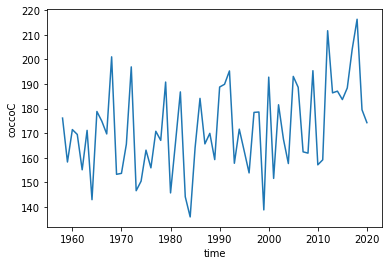

In [46]:
ts_box1.coccoC.plot()

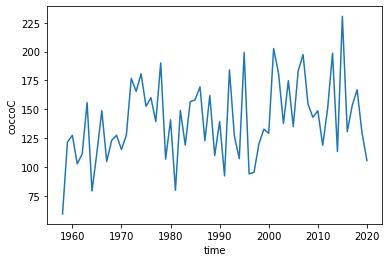

In [47]:
ts_box2.coccoC.plot()

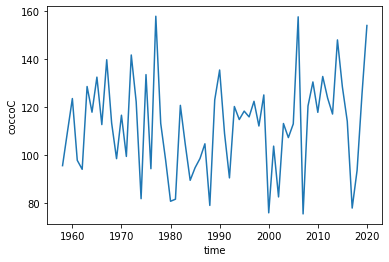

In [48]:
ts_box3.coccoC.plot()

#### Identify high cocco years vs low years

In [49]:
Box1_lo_cocco_years = xr.Dataset()
Box1_lo_cocco_mean = xr.Dataset()
Box1_lo_cocco_std = xr.Dataset()

Box1_hi_cocco_years = xr.Dataset()
Box1_hi_cocco_mean = xr.Dataset()
Box1_hi_cocco_std = xr.Dataset()


for var in env_vars:
    Box1_lo_cocco_years[var] = ts_box1[var].where(ts_box1.coccoC < (box1_coccoC_mean - box1_coccoC_std).values,drop=True).compute()
    Box1_lo_cocco_mean[var] = ts_box1[var].where(ts_box1.coccoC < (box1_coccoC_mean - box1_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box1_lo_cocco_std[var] = ts_box1[var].where(ts_box1.coccoC < (box1_coccoC_mean - box1_coccoC_std).values,drop=True).std(dim='time').compute()
    
    Box1_hi_cocco_years[var] = ts_box1[var].where(ts_box1.coccoC > (box1_coccoC_mean + box1_coccoC_std).values,drop=True).compute()
    Box1_hi_cocco_mean[var] = ts_box1[var].where(ts_box1.coccoC > (box1_coccoC_mean + box1_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box1_hi_cocco_std[var] = ts_box1[var].where(ts_box1.coccoC > (box1_coccoC_mean + box1_coccoC_std).values,drop=True).std(dim='time').compute()

In [50]:
Box2_lo_cocco_years = xr.Dataset()
Box2_lo_cocco_mean = xr.Dataset()
Box2_lo_cocco_std = xr.Dataset()

Box2_hi_cocco_years = xr.Dataset()
Box2_hi_cocco_mean = xr.Dataset()
Box2_hi_cocco_std = xr.Dataset()


for var in env_vars:
    Box2_lo_cocco_years[var] = ts_box2[var].where(ts_box2.coccoC < (box2_coccoC_mean - box2_coccoC_std).values,drop=True).compute()
    Box2_lo_cocco_mean[var] = ts_box2[var].where(ts_box2.coccoC < (box2_coccoC_mean - box2_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box2_lo_cocco_std[var] = ts_box2[var].where(ts_box2.coccoC < (box2_coccoC_mean - box2_coccoC_std).values,drop=True).std(dim='time').compute()
    
    Box2_hi_cocco_years[var] = ts_box2[var].where(ts_box2.coccoC > (box2_coccoC_mean + box2_coccoC_std).values,drop=True).compute()
    Box2_hi_cocco_mean[var] = ts_box2[var].where(ts_box2.coccoC > (box2_coccoC_mean + box2_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box2_hi_cocco_std[var] = ts_box2[var].where(ts_box2.coccoC > (box2_coccoC_mean + box2_coccoC_std).values,drop=True).std(dim='time').compute()

In [51]:
Box3_lo_cocco_years = xr.Dataset()
Box3_lo_cocco_mean = xr.Dataset()
Box3_lo_cocco_std = xr.Dataset()

Box3_hi_cocco_years = xr.Dataset()
Box3_hi_cocco_mean = xr.Dataset()
Box3_hi_cocco_std = xr.Dataset()


for var in env_vars:
    Box3_lo_cocco_years[var] = ts_box3[var].where(ts_box3.coccoC < (box3_coccoC_mean - box3_coccoC_std).values,drop=True).compute()
    Box3_lo_cocco_mean[var] = ts_box3[var].where(ts_box3.coccoC < (box3_coccoC_mean - box3_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box3_lo_cocco_std[var] = ts_box3[var].where(ts_box3.coccoC < (box3_coccoC_mean - box3_coccoC_std).values,drop=True).std(dim='time').compute()
    
    Box3_hi_cocco_years[var] = ts_box3[var].where(ts_box3.coccoC > (box3_coccoC_mean + box3_coccoC_std).values,drop=True).compute()
    Box3_hi_cocco_mean[var] = ts_box3[var].where(ts_box3.coccoC > (box3_coccoC_mean + box3_coccoC_std).values,drop=True).mean(dim='time').compute()
    Box3_hi_cocco_std[var] = ts_box3[var].where(ts_box3.coccoC > (box3_coccoC_mean + box3_coccoC_std).values,drop=True).std(dim='time').compute()

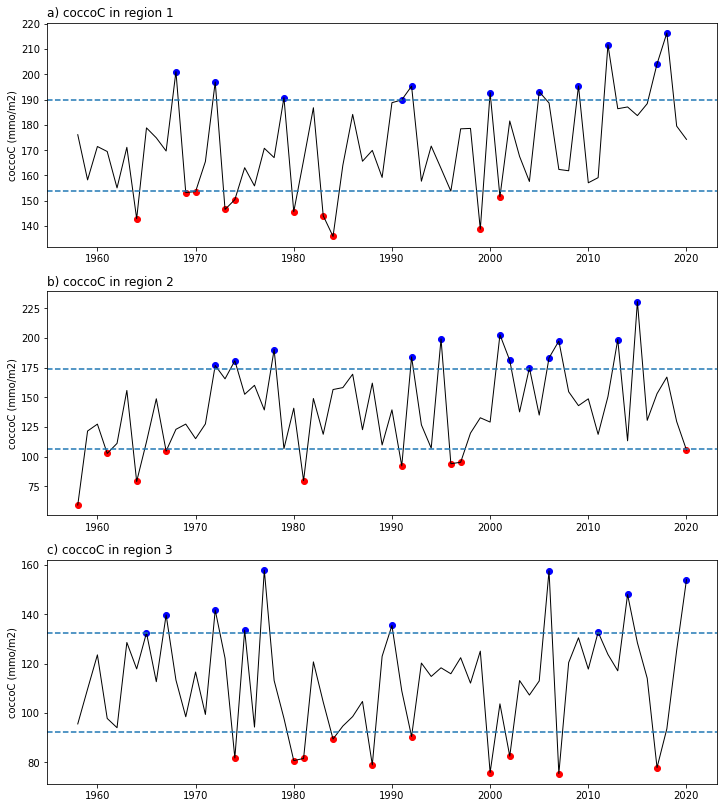

In [52]:
fig = plt.figure(figsize=(12,14))

ax = fig.add_subplot(3,1,1)
ax.set_title('a) coccoC in region 1 ',loc='left')

ax.plot(ts_box1.time, ts_box1.coccoC, color='black', linewidth=1)
ax.axhline(box1_coccoC_mean+box1_coccoC_std,linestyle='--')
ax.axhline(box1_coccoC_mean-box1_coccoC_std,linestyle='--')
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

ax = fig.add_subplot(3,1,2)
ax.set_title('b) coccoC in region 2 ',loc='left')

ax.plot(ts_box2.time, ts_box2.coccoC, color='black', linewidth=1)
ax.axhline(box2_coccoC_mean+box2_coccoC_std,linestyle='--')
ax.axhline(box2_coccoC_mean-box2_coccoC_std,linestyle='--')
ax.scatter(Box2_lo_cocco_years.time, Box2_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box2_hi_cocco_years.time, Box2_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

ax = fig.add_subplot(3,1,3)
ax.set_title('c) coccoC in region 3 ',loc='left')

ax.plot(ts_box3.time, ts_box3.coccoC, color='black', linewidth=1)
ax.axhline(box3_coccoC_mean+box3_coccoC_std,linestyle='--')
ax.axhline(box3_coccoC_mean-box3_coccoC_std,linestyle='--')
ax.scatter(Box3_lo_cocco_years.time, Box3_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box3_hi_cocco_years.time, Box3_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

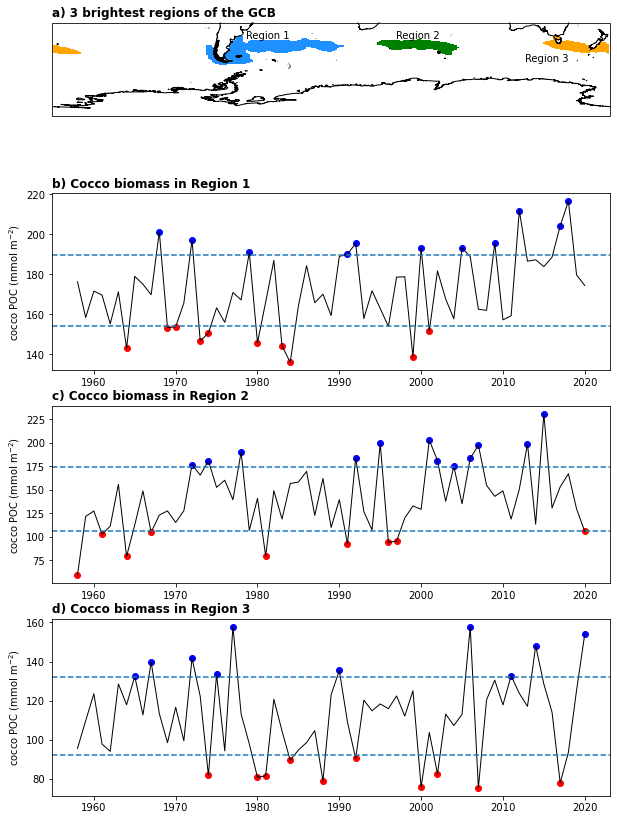

In [54]:
fig = plt.figure(figsize=(10,15))

ax = fig.add_subplot(4,1,1, projection=ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

colorlist = [ 'dodgerblue','green','orange']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('regs', colorlist, N=3)

ax.set_title('a) 3 brightest regions of the GCB ', loc='left',fontweight='bold')

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box1)
pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=4)

ax.text(-55,-40,"Region 1",transform=ccrs.PlateCarree())

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box2)
pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=4)
ax.text(42,-40,"Region 2",transform=ccrs.PlateCarree())

lon,lat,field = utils.adjust_pop_grid(lons, lats, mask_box3)
pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=4)
ax.text(125,-55,"Region 3",transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=1)



ax = fig.add_subplot(4,1,2)
ax.set_title('b) Cocco biomass in Region 1 ',loc='left',fontweight='bold') #,color='dodgerblue')

ax.plot(ts_box1.time, ts_box1.coccoC, color='black', linewidth=1)
ax.axhline(box1_coccoC_mean+box1_coccoC_std,linestyle='--')
ax.axhline(box1_coccoC_mean-box1_coccoC_std,linestyle='--')
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.coccoC, color ='blue')


ax.set(xlabel='',ylabel='cocco POC (mmol m$^{-2}$)');

ax = fig.add_subplot(4,1,3)
ax.set_title('c) Cocco biomass in Region 2 ',loc='left',fontweight='bold') #,color='green')

ax.plot(ts_box2.time, ts_box2.coccoC, color='black', linewidth=1)
ax.axhline(box2_coccoC_mean+box2_coccoC_std,linestyle='--')
ax.axhline(box2_coccoC_mean-box2_coccoC_std,linestyle='--')
ax.scatter(Box2_lo_cocco_years.time, Box2_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box2_hi_cocco_years.time, Box2_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='cocco POC (mmol m$^{-2}$)');

ax = fig.add_subplot(4,1,4)
ax.set_title('d) Cocco biomass in Region 3 ',loc='left',fontweight='bold') #,color='orange')

ax.plot(ts_box3.time, ts_box3.coccoC, color='black', linewidth=1)
ax.axhline(box3_coccoC_mean+box3_coccoC_std,linestyle='--')
ax.axhline(box3_coccoC_mean-box3_coccoC_std,linestyle='--')
ax.scatter(Box3_lo_cocco_years.time, Box3_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box3_hi_cocco_years.time, Box3_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='cocco POC (mmol m$^{-2}$)');

fig.savefig('/glade/work/kristenk/figs/cocco_variability_3regs.png', bbox_inches='tight', dpi=300, format='png');

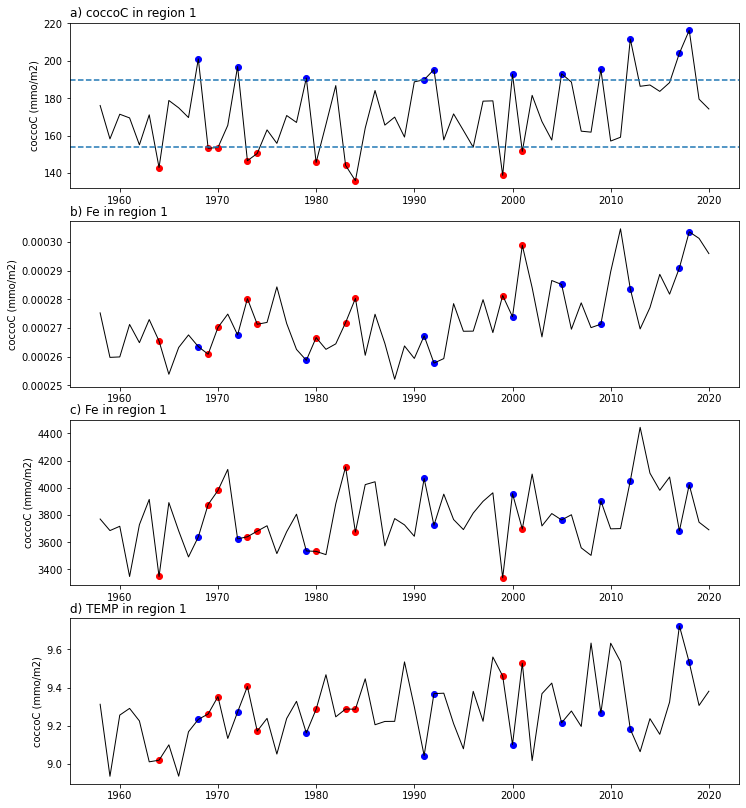

In [86]:
fig = plt.figure(figsize=(12,14))

ax = fig.add_subplot(4,1,1)
ax.set_title('a) coccoC in region 1 ',loc='left')

ax.plot(ts_box1.time, ts_box1.coccoC, color='black', linewidth=1)
ax.axhline(box1_coccoC_mean+box1_coccoC_std,linestyle='--')
ax.axhline(box1_coccoC_mean-box1_coccoC_std,linestyle='--')
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.coccoC, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.coccoC, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');


ax = fig.add_subplot(4,1,2)
ax.set_title('b) Fe in region 1 ',loc='left')

ax.plot(ts_box1.time, ts_box1.Fe, color='black', linewidth=1)
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.Fe, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.Fe, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

ax = fig.add_subplot(4,1,3)
ax.set_title('c) Fe in region 1 ',loc='left')

ax.plot(ts_box1.time, ts_box1.HMXL, color='black', linewidth=1)
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.HMXL, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.HMXL, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

ax = fig.add_subplot(4,1,4)
ax.set_title('d) TEMP in region 1 ',loc='left')

ax.plot(ts_box1.time, ts_box1.TEMP, color='black', linewidth=1)
ax.scatter(Box1_lo_cocco_years.time, Box1_lo_cocco_years.TEMP, color ='red')
ax.scatter(Box1_hi_cocco_years.time, Box1_hi_cocco_years.TEMP, color ='blue')

ax.set(xlabel='',ylabel='coccoC (mmo/m2)');

### Print out hi and low cocco years for each region

In [93]:
Box1_lo_cocco_years.time.values

array([1964, 1969, 1970, 1973, 1974, 1980, 1983, 1984, 1999, 2001])

In [94]:
Box1_hi_cocco_years.time.values

array([1968, 1972, 1979, 1991, 1992, 2000, 2005, 2009, 2012, 2017, 2018])

In [95]:
Box2_lo_cocco_years.time.values

array([1958, 1961, 1964, 1967, 1981, 1991, 1996, 1997, 2020])

In [96]:
Box2_hi_cocco_years.time.values

array([1972, 1974, 1978, 1992, 1995, 2001, 2002, 2004, 2006, 2007, 2013,
       2015])

In [97]:
Box3_lo_cocco_years.time.values

array([1974, 1980, 1981, 1984, 1988, 1992, 2000, 2002, 2007, 2017])

In [92]:
Box3_hi_cocco_years.time.values

array([1965, 1967, 1972, 1975, 1977, 1990, 2006, 2011, 2014, 2020])